<a href="https://colab.research.google.com/github/vinodmahi/bangalore/blob/main/bangalore_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Read data**


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
#import the data using pandas
data =  pd.read_csv("bangalore-cas-alerts.csv")

In [ ]:
data


,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
...,...,...,...,...,...,...,...
207612,864504031432707,12.976435,77.741516,Kadugodi,UFCW,0,2018-07-30T10:56:12.000Z
207613,864504031035658,12.986425,77.745117,Kadugodi,UFCW,12,2018-07-30T11:07:19.000Z
207614,863977033828919,12.969396,77.749886,Hagadur,Overspeed,17,2018-07-30T11:14:02.000Z
207615,863977033715231,12.974123,77.746841,Hagadur,FCW,36,2018-07-30T11:16:24.000Z


In [ ]:
data.shape


(207617, 7)

# **Step 2 : Pre process and clean the data**

## **To preprocess and clean the data, we need to handle missing values, remove duplicates, address inconsistent formatting, and normalize the data. This ensures data quality and prepares it for analysis by resolving inconsistencies and making it ready for further exploration.**

In [ ]:
#check for null values
data.isna().sum()

deviceCode_deviceCode                 0
deviceCode_location_latitude          0
deviceCode_location_longitude         0
deviceCode_location_wardName          0
deviceCode_pyld_alarmType             0
deviceCode_pyld_speed                 0
deviceCode_time_recordedTime_$date    0
dtype: int64

In [ ]:
#check for duplicates
duplicates = data.duplicated()

In [ ]:
#count the number of duplicates
num_duplicates = duplicates.sum()
print("number of duplicates are: ", num_duplicates)

number of duplicates are:  55341


## One common way to visualize duplicate values is by using a bar chart or a histogram. Each bar represents a unique category, in this case, "duplicates" and "non-duplicates

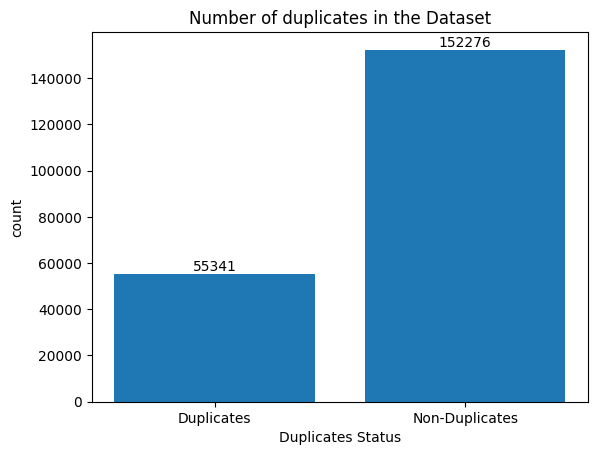

In [ ]:
#count the number of duplicates
num_duplicates = duplicates.sum()
num_non_duplicates = len(data) - num_duplicates

#create a bar plot

labels = ['Duplicates','Non-Duplicates']
values = [num_duplicates, num_non_duplicates]

plt.bar(labels, values)
plt.xlabel('Duplicates Status')
plt.ylabel('count')
plt.title('Number of duplicates in the Dataset')

# add count numbers om top of the bars
for i, v in enumerate(values):
  plt.text(i,v,str(v), ha='center',va ='bottom')

plt.show()

In [ ]:
# removing the duplicates record for further analysis
data_cleaned = data.drop_duplicates()

#print the number of rows in the cleaned dataframe
print("Number of rows after removing duplicates:",len(data_cleaned))

#optionally, save the cleaned dataframe to a new csv file
data_cleaned.to_csv('cleaned_bangalore-case-alert.csv',index = False)


Number of rows after removing duplicates: 152276


In [ ]:
print("The size of data reduced from ",len(data),'rows to',len(data_cleaned),'Hence',num_duplicates,"rows were duplicate , which is pretty high number")

The size of data reduced from  207617 rows to 152276 Hence 55341 rows were duplicate , which is pretty high number


In [ ]:
df = data_cleaned

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   deviceCode_deviceCode               152276 non-null  int64  
 1   deviceCode_location_latitude        152276 non-null  float64
 2   deviceCode_location_longitude       152276 non-null  float64
 3   deviceCode_location_wardName        152276 non-null  object 
 4   deviceCode_pyld_alarmType           152276 non-null  object 
 5   deviceCode_pyld_speed               152276 non-null  int64  
 6   deviceCode_time_recordedTime_$date  152276 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


## To facilitate quick analysis, it is advisable to rename the dataset columns with shorter and more meaningful names. This will enhance convenience and improve the clarity of the column names for easier understanding and interpretation during the analysis process.

In [ ]:
columns = {
    "deviceCode_deviceCode": "divicecode",
    "deviceCode_location_latitude": "latitude",
    "deviceCode_location_longitude": "longitude",
    "deviceCode_location_wardName": "wardname",
    "deviceCode_pyld_alarmType": "alaramtype",
    "deviceCode_pyld_speed": "speed",
    "deviceCode_time_recordedTime_": "record_date_time"
}

df.rename(columns=columns, inplace=True, copy=False)
print("Updated column names of the dataframe:", df.columns)


Updated column names of the dataframe: Index(['divicecode', 'latitude', 'longitude', 'wardname', 'alaramtype',
       'speed', 'deviceCode_time_recordedTime_$date'],
      dtype='object')


<ipython-input-53-70195dde977b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=columns, inplace=True, copy=False)


# **Step 3 :Data analysis and visualisation**

In [ ]:
#find the range of co-ordunates within which the data belongs

lat_max = df.latitude.max()
lat_min = df.latitude.min()
print("range of latitude:",lat_max,lat_min)

lon_max =df.longitude.max()
lon_min = df.longitude.min()
print("range of longitude:",lon_max,lon_min)

range of latitude: 13.070075035095217 12.686662673950195
range of longitude: 77.80682373046875 77.5081787109375


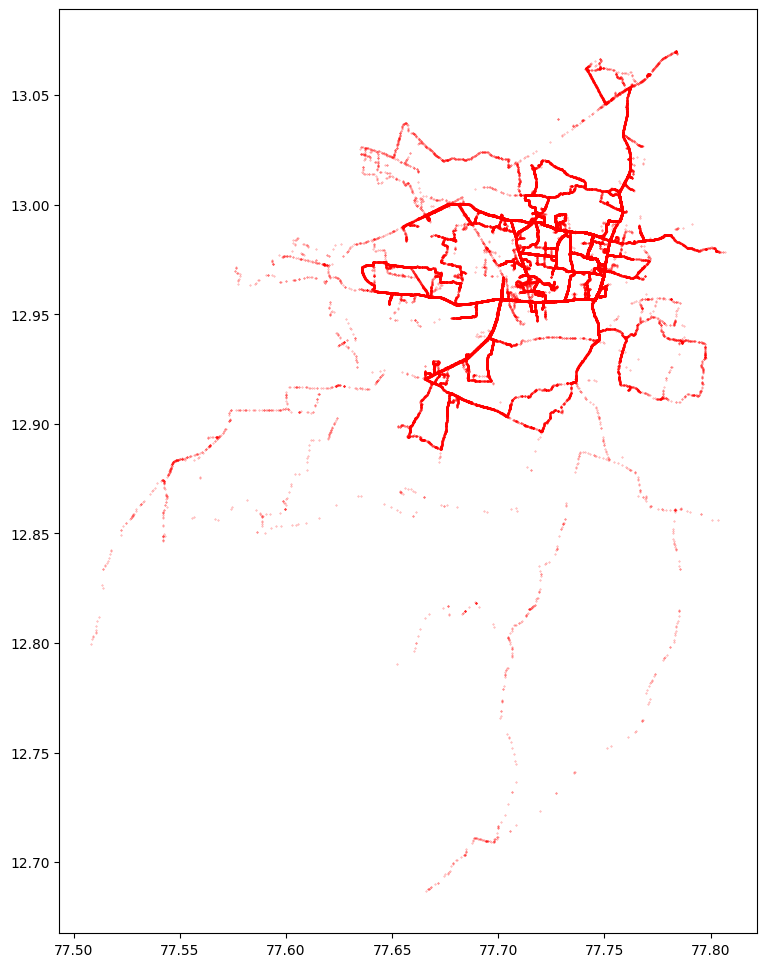

In [ ]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(df.longitude, df.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

Before we explore each attribute in detail, let us plot all CDS alarm data on a map of Bangalore/Bengaluru by the co-ordinates specified, to generate a heatmap of locations and speed of vehicles at the time of alarm generation.


On this heatmap, magnitude of speed is represented by color temperatures - cooler (bluish) plots indicate low speeds whereas warmer (reddish) colors represent higher speeds.

<ipython-input-56-6cf436f651d0>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])       # Set the tick labels for the colorbar


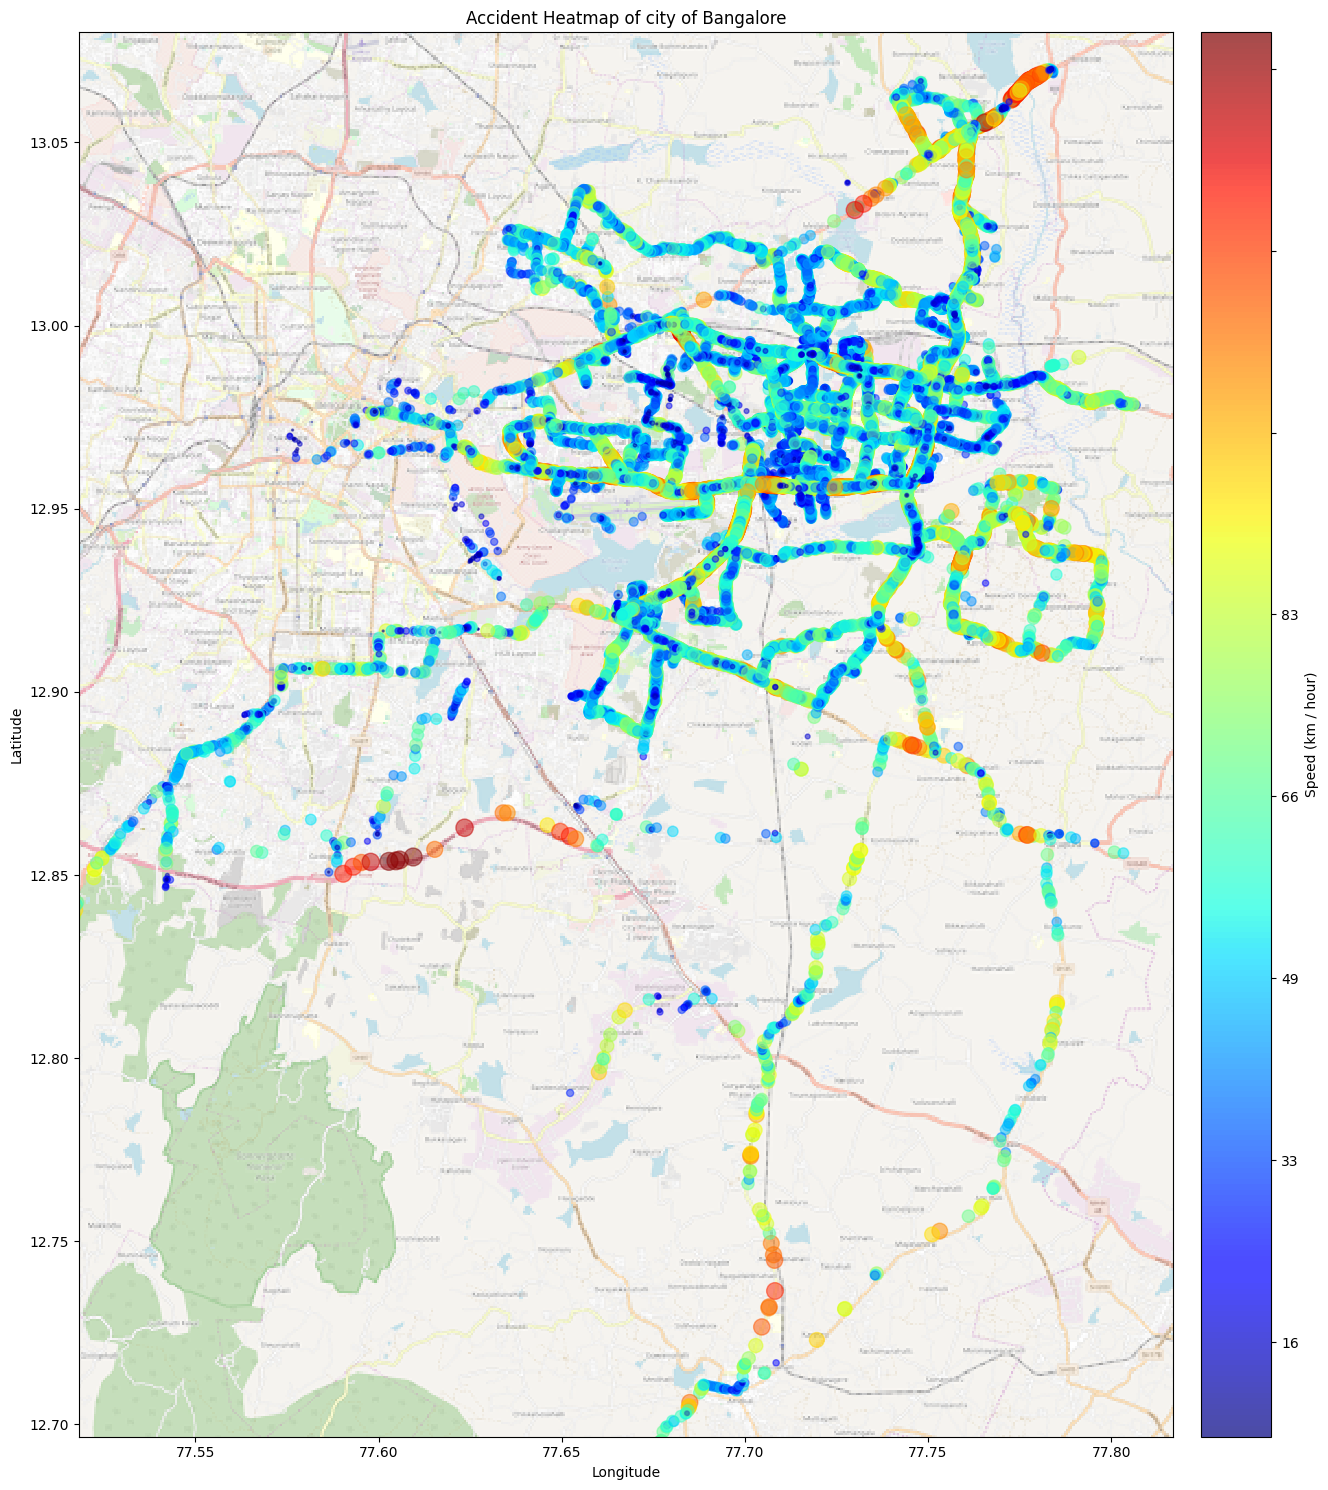

In [ ]:
import matplotlib.pyplot as plt    #importing the matplotlib library for  plotting
import urllib.request              #importing the urllib.request module for opening url's
from PIL import Image              # importing the image module from the pil library for working with image
import numpy as np                 # importing the numpy for numerical computiations

# URL to the image
bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'

# Read the image from URL
with urllib.request.urlopen(bangalore_map_img) as url:        #open the url
    img = Image.open(url)                                     # open the image from the url
    bangalore_map = np.array(img)                             # convert the image to a numpy array

# Define the color map
cmap = plt.get_cmap("jet")
axes = df.plot(figsize=(15,15), kind='scatter',

               #assign the variable x,y where x = longtitude and y = latitiude
                    x='longitude', y='latitude',
                    alpha=0.5, marker="o", s=df["speed"]*2,
                    c=df["speed"], cmap=cmap,
                    colorbar=False)

# Small value used for adjusting the bounding box of the plot
epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon,
             lat_min + epsilon, lat_max + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0,
           cmap=cmap, interpolation='nearest', alpha=0.7)


axes.set_xlabel("Longitude")  #set the label for the x-axis
axes.set_ylabel("Latitude")   # set the label for the y-axis
axes.set_title('Accident Heatmap of city of Bangalore')  # set the title of the plot

# Colorbar
speed = df["speed"].values   # getting the speed value  form the dataframe(df)

# Create tick values for the colorbar based on the minimum and maximum speed values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)                   # Create a colorbar for the plot
cbar.set_label("Speed (km / hour)")                                # Set the label for the colorbar
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])       # Set the tick labels for the colorbar

plt.tight_layout()                                                 # Adjust the layout of the plot to prevent overlapping

plt.show()                                                         # Display the plot



## from the above plots we can reveal the name of the area and roads are



*   old madras road/bangalore-tirupathi highway
*  sarjapur road

*   some part outer ring road










In [ ]:
df.head(2)

,divicecode,latitude,longitude,wardname,alaramtype,speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z


# **Device code**

code of the sensor used in buss. let check how much the device code we have in this dataframe

In [ ]:
#creating a new variable caleed unique_devicecide and printing the all unique number with its length
unique_devicecode = df['divicecode'].unique()
print("number of unique devices used in buss = ",len(unique_devicecode))

number of unique devices used in buss =  26


# **AVERAGE SPEED**

In [ ]:
avg_speed = np.average([df['speed']])
formatted_speed = "{:.1f}".format(avg_speed)
print("The average speed of the buses is:", formatted_speed)


The average speed of the buses is: 22.1


# **Ward Name**

name of the ward where the alarm was generated


In [ ]:
print("total number of ward in the datset are:",len(df["wardname"].unique()))

total number of ward in the datset are: 50


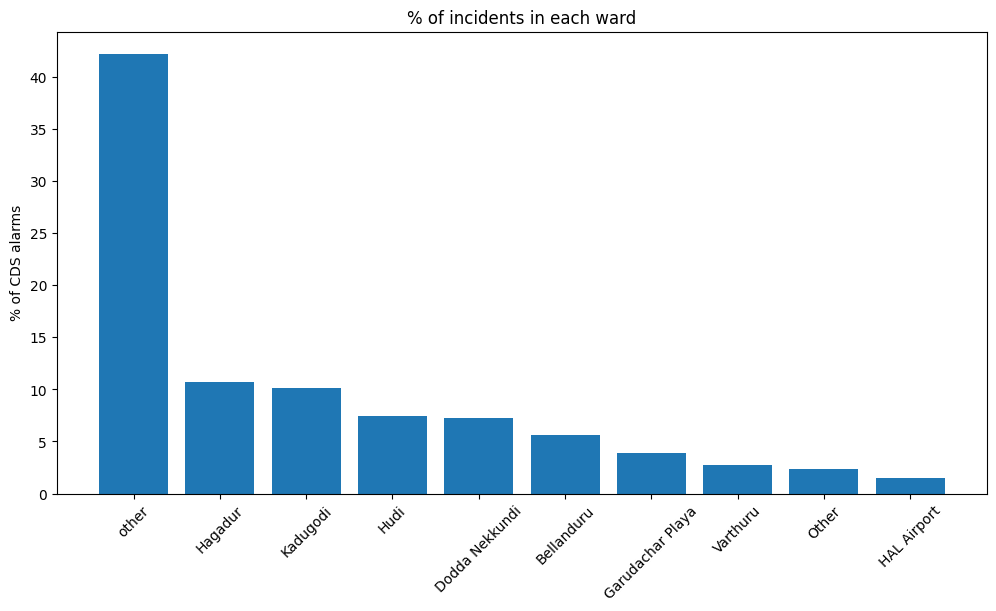

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(figsize=(12, 6))

# Calculate the normalized value counts of ward names and sort in descending order
data = df['wardname'].value_counts(normalize=True).sort_values(ascending=False)

# Select the top 10 wards
data = data.head(10)

# Create a bar plot
axes.bar(data.index, data * 100)

# Set the y-axis label
axes.set_ylabel("% of CDS alarms")

# Set the x-axis tick labels with rotation
axes.set_xticks(np.arange(len(data.index)))
axes.set_xticklabels(data.index, rotation=45)

# Set the title of the plot
axes.set_title("% of incidents in each ward")

# Display the plot
plt.show()


In [ ]:
df.head(1)

,divicecode,latitude,longitude,wardname,alaramtype,speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z


# from the above plot we can see that majority 40 to 45% are captured againest ward name as others  due to improper data


# **ALARM TYPES**


*   **FORWARD COLLISION WARNINGS (FCW)**

    Forward Collision Warnings (FCW) help drivers avoid hitting the car, truck, or motorcycle in front.
    

*   **URBAN FORWARD COLLISION WARNINGS (UFCW)**

    Urban Forward Collision Warnings (UFCW) give alerts to prevent possible slow collisions in heavy traffic when driving below 30 km/h.

*   **HEADWAY MONITORING WARNING (HMW)**

    The headway monitoring warning (HMW) helps drivers maintain a safe following distance from the vehicle ahead of them by providing visual and audible alerts if the distance becomes unsafe. Active above 30 kmph, this sensor generates alarm and displays the amount of time, in seconds, to the vehicle in front when that time becomes 2.5 seconds or less.
*   **LANE DEPARTURE WARNINGS (LDW)**

    The LDW provides an alert when the vehicle unintentionally departs from the driving lane without using the turn signals. If the turn signals are used when changing lanes, an alert is not generated. Usually active above 55 kmph, LDW might not work well if lanes are unmarked or poorly marked.
    This is further classified into: (a) LDWL, for lane departures towards left lane and (b) LDWR, for the same towards right lane.


*  **PEDESTRIANS AND CYCLIST DETECTION AND COLLISION WARNING (PCW)**

    The PCW notifies the driver of a pedestrian or cyclist in the danger zone and alerts drivers of an imminent collision with a pedestrian or cyclist. PCW works well when vehicle is below 50 kmph.


*   **OVERSPEEDING**

    Detects and classifies various visible speed limit signs and provides visual indication when the vehicle’s speed exceeds the posted speed limit.





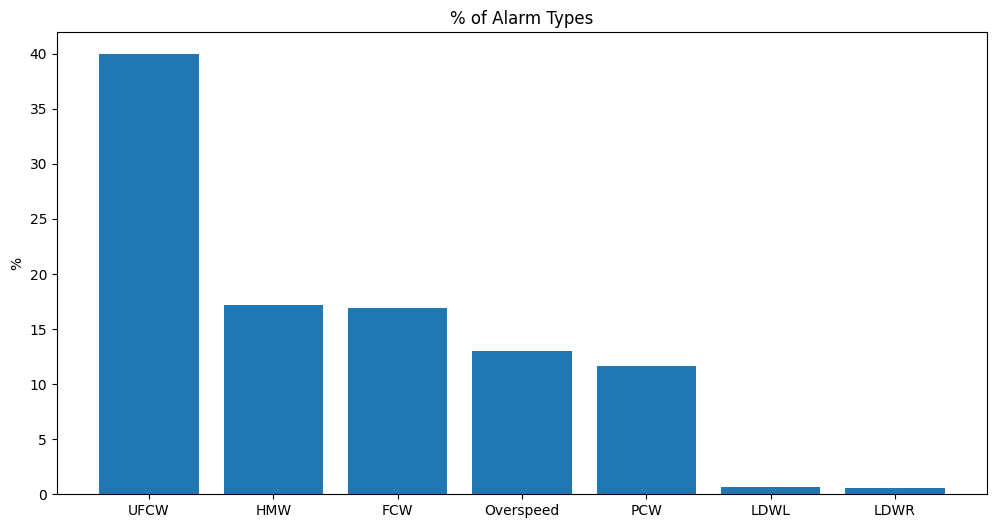

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(figsize=(12, 6))

# Calculate the normalized value counts of alarm types
data = df['alaramtype'].value_counts(normalize=True)

# Create a bar plot
axes.bar(data.index, data * 100)

# Set the title of the plot
axes.set_title('% of Alarm Types')

# Set the x-axis label to an empty string
axes.set_xlabel('')

# Set the y-axis label
axes.set_ylabel('%')

# Display the plot
plt.show()


- The majority of alarms in Bangalore are related to UFCW, indicating potential collisions at low speeds.
- This suggests that speed alone may not be the primary factor contributing to accidents on Bangalore roads.
- Despite the low average speed of traffic in Bangalore, there are still significant risks of collisions at lower speeds.
- It highlights the importance of considering other factors such as traffic congestion, road conditions, and driver behavior in accident prevention.
- Factors like traffic congestion, road conditions, and driver behavior may have a more significant impact on causing accidents in the city.
- Addressing these additional factors alongside speed is crucial for improving road safety in Bangalore.
- Merely focusing on reducing speed limits may not be sufficient to mitigate the overall risks and prevent accidents effectively.

In [ ]:
# Create a dictionary to map the original alarm types to the new categories
alarm_mapping = {"UFCW":"LSCW", "HMW":"HSCW", "FCW":"HSCW", "LDWL":"LDW", "LDWR":"LDW", "Overspeed":"Overspeed", "PCW":"PCW"}

# Map the values of the 'alaramtype' column in the DataFrame to the corresponding categories using the alarm_mapping dictionary
df.loc[:, 'alarmTypeCat'] = df['alaramtype'].map(alarm_mapping)

# Create a new column named 'alarmTypeCat' in the DataFrame and assign the mapped values to it

# The 'alarmTypeCat' column now contains the new categories for each alarm type based on the mapping defined in the alarm_mapping dictionary

# This allows us to group alarms based on the new categories for further analysis or visualization


<ipython-input-64-65ce2f5ffa9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'alarmTypeCat'] = df['alaramtype'].map(alarm_mapping)


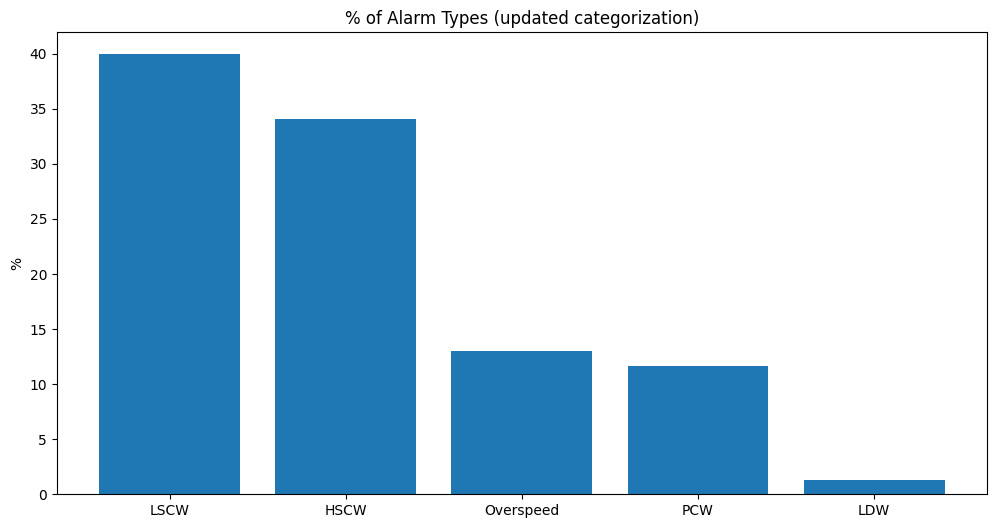

In [ ]:
# Create a figure and axes for the plot with a specific size
fig, axes = plt.subplots(figsize=(12,6))

# Calculate the normalized counts of each category in the 'alarmTypeCat' column
data = df['alarmTypeCat'].value_counts(normalize=True)

# Create a bar plot with the category names on the x-axis and the normalized percentages on the y-axis
axes.bar(data.index, data*100)

# Set the title of the plot
axes.set_title('% of Alarm Types (updated categorization)')

# Remove the label for the x-axis
axes.set_xlabel('')

# Set the label for the y-axis
axes.set_ylabel('%')

# Display the plot
plt.show()


### Observations on Alarm Types:
1. Rear-end collision with vehicle in front has the highest occurances, with such collisions happening at low speed being highest.
2. Number of instances of rear-end collision at high speed is also significantly high.
3. Overspeeding and collisions with pedentrians and cyclists are next biggest concerns.
4. Percentage of LDW is very low. However, that is most likely because most of the roads are not clearly marked with lane divider markers.

### Speed
The speed data that is available in the dataset is the speed recorded by buses at the time of alarm generation, and not overall speed of vehicles/buses on Bangalore roads. The highest speed that is recorded is 83 kmph, however the average speed is only 22 kmph.

In [ ]:
df['speed']


0         32
2         41
4         37
6         32
8         27
          ..
207612     0
207613    12
207614    17
207615    36
207616    28
Name: speed, Length: 152276, dtype: int64

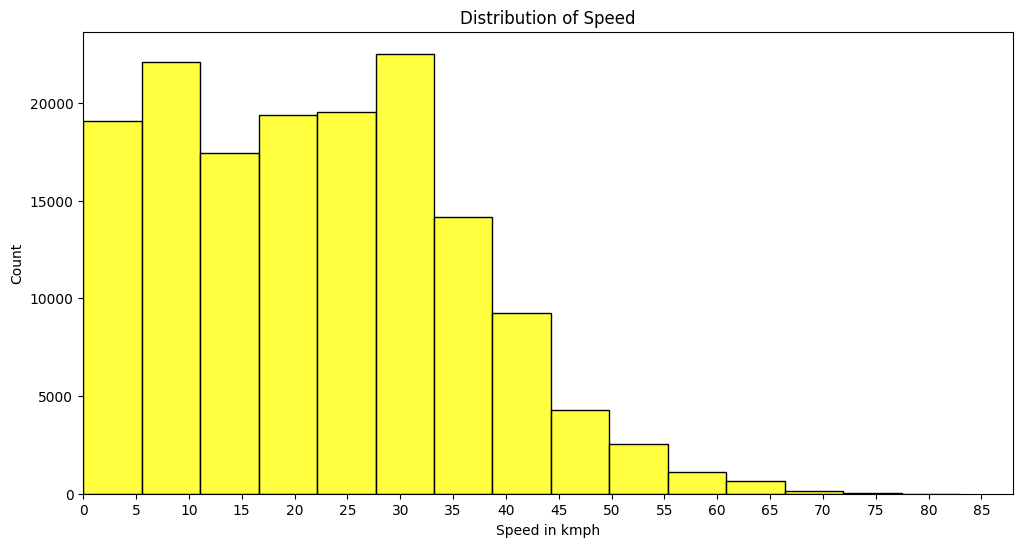

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
data = df['speed']

sns.histplot(data, bins=15, color='yellow')

axes.set_xticks(np.arange(0, data.max()+5, 5))
axes.set_xticklabels([str(val) for val in np.arange(0, data.max()+5, 5)])
axes.set_xlim(0, data.max()+5)
axes.set_xlabel('Speed in kmph')
axes.set_title('Distribution of Speed')
axes.grid(False)


plt.show()

this graph provides insights into the distribution of speed in the dataset, suggesting that the majority of instances have lower speeds, with only a few instances having higher speeds.

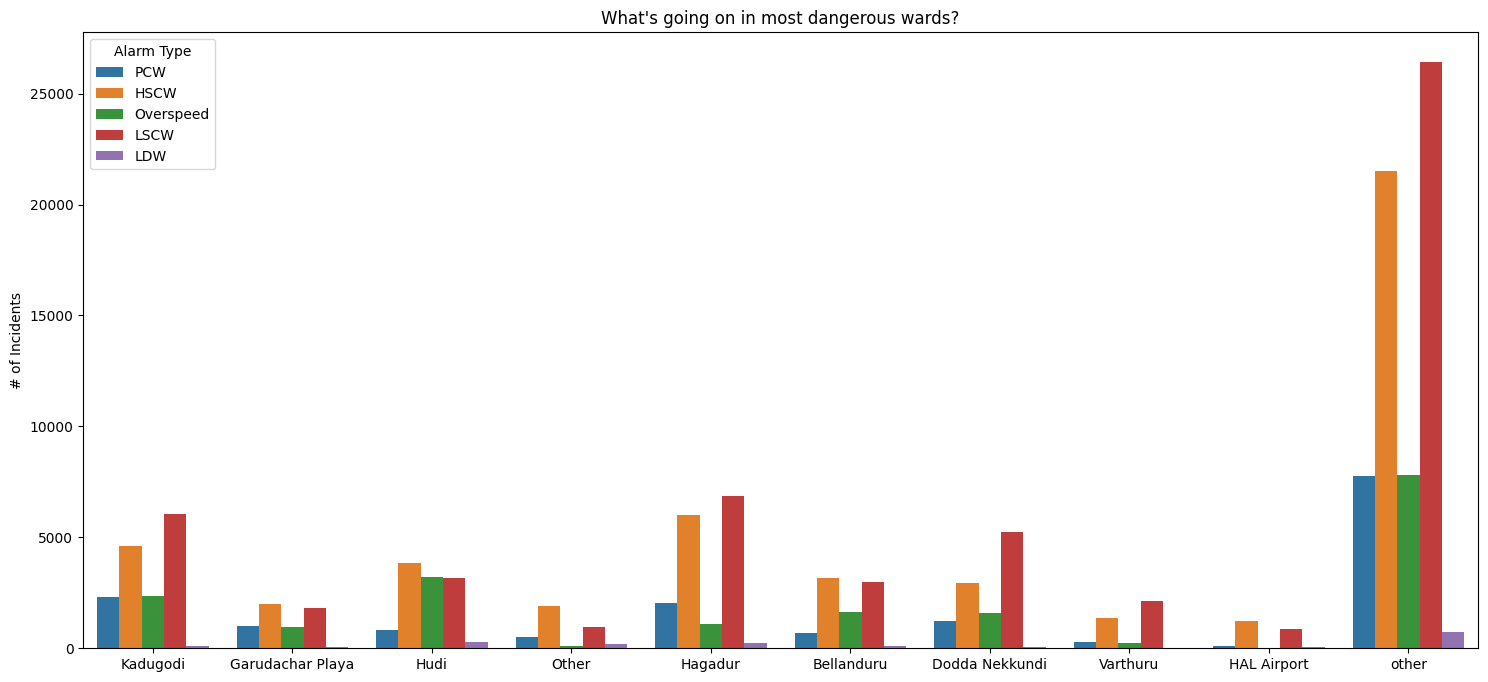

In [ ]:

fig, axes = plt.subplots(figsize=(18,8))
data = df['wardname'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
ward_top = data.index

ward_top_data = df[df.wardname.isin(ward_top)]
sns.countplot(x='wardname', hue='alarmTypeCat', data=ward_top_data, ax=axes)

axes.legend(title='Alarm Type')
axes.set_xlabel('')
axes.set_ylabel('# of Incidents')
axes.set_title('What\'s going on in most dangerous wards?')

plt.show()

### Observations:
1. Most incidents of high and low speed collisions happen in Hagadur.
2. Overspeeding is most common in Garudachar Playa.
3. Hagadur is infamous for collisions with pedestrians and cyclist as well, not to mention lane change without indicators.